# Fashion MNIST
## The 'Hello World' of Deep-Learning, solved with DNN (Deep-Neural Networks)


The first step is to import the libraries that will be used in the implementation of the model

In [7]:
import tensorflow as tf
from tensorflow import keras

import numpy as np
import matplotlib.pyplot as plt

We will now import the 'Fashion MNIST dataset' from the keras library. As shown below, the MNIST data-set consists of images if 10 fashion objects. All the images can be classified as T-shirt/top, Trouser, Pullover, Dress, Coat, Sandal, Shirt, Sneaker, Bag, and Ankle Boot. 

The goal is to build a multi-class classifier that is able to label any given image. We will be using Deep-Learning approach.

In [8]:
from IPython.display import Image
from IPython.core.display import HTML 
Image(url= "https://4.bp.blogspot.com/-OQZGt_5WqDo/Wa_Dfa4U15I/AAAAAAAAAUI/veRmAmUUKFA19dVw6XCOV2YLO6n-y_omwCLcBGAs/s1600/out.jpg", width= 400, height=400)

The fashion MNIST dataset comes with the keras library. It is imported as fashion_mnist. This data-set comes with a pre-defined training set and test-set.

In [9]:
fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

The training set consists of 60000 images which are 28x28 pixel dimensions. All of the images are in black and white. Hence the color intensities range from 0 to 255

In [10]:
print(X_train_full.shape)
X_train_full.dtype

(60000, 28, 28)


dtype('uint8')

From the first 5000 samples we will create a valdation set to gauge the performance of the training set. So as to bring the pixel values between 0 and 1 (such data is better handled by DNNs), we will divide the pixel values with 255

In [11]:
#Create validation set and normalize color intensities by dividing by 255
X_valid, X_train = X_train_full[:5000] / 255.0, X_train_full[5000:] / 255.0

y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

Below are the class names stored in an array. 

In [12]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

Our DNN will consist two hidden layers of 300 and 100 units respectively. Each of the use the relu function as the activation function. Finally, the output layer consists of 10 output layers (corresponding to our 10 classes). The architecture is defined below:

In [13]:
#Classification with two hidden layers
model  = keras.models.Sequential([
    keras.layers.Flatten(input_shape = [28, 28]), #Flatten 28x28 image into a 1D array
    keras.layers.Dense(300, activation = "relu"),
    keras.layers.Dense(100, activation = "relu"),
    keras.layers.Dense(10, activation= "softmax")
])

In [14]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 300)               235500    
_________________________________________________________________
dense_1 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


The model will now be compiled with the "sparse_categorical_crossentropy" loss function, the "sgd" (stochastic gradient descent) optimizer with accuracy as the metric

In [15]:
#Compiling the model
model.compile(loss = "sparse_categorical_crossentropy",
                optimizer="sgd",
                metrics = ["accuracy"])

We will now fit the model with 30 epochs. The performance after each epoch will be compared with the validation set as well.

In [16]:
history = model.fit(X_train, y_train, epochs = 30, validation_data= (X_valid, y_valid))

Epoch 1/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.7203 - accuracy: 0.7650 - val_loss: 0.5161 - val_accuracy: 0.8248
Epoch 2/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.4873 - accuracy: 0.8295 - val_loss: 0.4639 - val_accuracy: 0.8394
Epoch 3/30
1719/1719 [==============================] - 2s 1ms/step - loss: 0.4440 - accuracy: 0.8444 - val_loss: 0.4106 - val_accuracy: 0.8630
Epoch 4/30
1719/1719 [==============================] - 3s 1ms/step - loss: 0.4148 - accuracy: 0.8536 - val_loss: 0.4000 - val_accuracy: 0.8634
Epoch 5/30
1719/1719 [==============================] - 2s 1ms/step - loss: 0.3951 - accuracy: 0.8606 - val_loss: 0.3925 - val_accuracy: 0.8656
Epoch 6/30
1719/1719 [==============================] - 2s 1ms/step - loss: 0.3778 - accuracy: 0.8671 - val_loss: 0.3800 - val_accuracy: 0.8668
Epoch 7/30
1719/1719 [==============================] - 2s 1ms/step - loss: 0.3650 - accuracy: 0.8710 - val_loss: 0.3574 - val_accuracy:

Given below is the plot for training performance. The loss keeps on going down as the number of epochs keeps on decreasing. Also, the validation sets are closely imitating the training set. This shows that the model chosen is performing well on the training set.

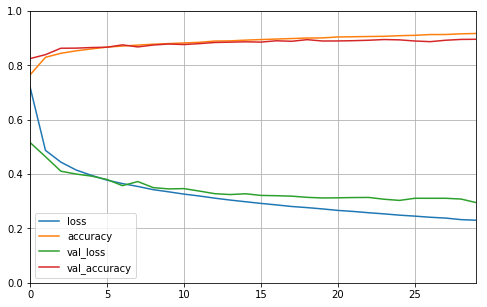

In [17]:
#history object contains history about the models
#history.history contains loss and extra parameters
import pandas as pd
import matplotlib.pyplot as plt

pd.DataFrame(history.history).plot(figsize= (8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [18]:
#Make some predictions using the first 3 values of the test dataset
#Model.predict gives probability of all the classes
X_new = X_test[:3]
y_proba = model.predict(X_new)
y_proba.round(2)

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [19]:
#If we want just the class with maximum probability,

y_pred = model.predict_classes(X_new)
#y_pred
for i in y_pred:

    print(class_names[int(i)])



Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
Ankle boot
Pullover
Trouser
